# Evaluation

This notebook evaluates the Hydronn retrievals on the test data.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import pickle

In [2]:
from hydronn.utils import load_style
load_style()

## Results

In [11]:
from hydronn.utils import decompress_and_load
results_h4_ir = decompress_and_load("/home/simonpf/data_2/hydronn/results/test_data/hydronn_4_ir.nc.gz")
results_h4_all = decompress_and_load("/home/simonpf/data_2/hydronn/results/test_data/hydronn_4_all.nc.gz")
results_h2 = decompress_and_load("/home/simonpf/data_2/hydronn/results/test_data/hydronn_2.nc.gz")

In [12]:
results_h4_all = decompress_and_load("/home/simonpf/data_2/hydronn/results/test_data/hydronn_4_all.nc.gz")

## Scatter plots

In [57]:
bins = np.logspace(-3, 2, 101)
bins[0] = -1e-3
db = np.diff(bins).reshape(-1, 1) * np.diff(bins).reshape(1, -1)

sp_true = results_h4_ir.surface_precip_true.data
sp = results_h4_ir.surface_precip.data
y_h4_ir, _, _ = np.histogram2d(sp_true.ravel(), sp.ravel(), bins=bins)
y_h4_ir /= (y_h4_ir * db).sum(axis=1, keepdims=True)

sp_true = results_h4_all.surface_precip_true.data
sp = results_h4_all.surface_precip.data
y_h4_all, _, _ = np.histogram2d(sp_true.ravel(), sp.ravel(), bins=bins)
y_h4_all /= (y_h4_all * db).sum(axis=1, keepdims=True)

sp_true = results_h2.surface_precip_true.data
sp_true = 0.25 * (
    sp_true[:, 0::2, 0::2] +
    sp_true[:, 0::2, 1::2] +
    sp_true[:, 1::2, 0::2] +
    sp_true[:, 1::2, 1::2]
)
sp = results_h2.surface_precip.data
sp = 0.25 * (
    sp[:, 0::2, 0::2] +
    sp[:, 0::2, 1::2] +
    sp[:, 1::2, 0::2] +
    sp[:, 1::2, 1::2]
)
y_h2, _, _ = np.histogram2d(sp_true.ravel(), sp.ravel(), bins=bins)
y_h2 /= (y_h2 * db).sum(axis=1, keepdims=True)

/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1433: RuntimeWarning: invalid value encountered in less_equal
  z = ma.masked_where(z <= 0, z)
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Log scale: values of z <= 0 have been masked
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1433: RuntimeWarning: invalid value encountered in less_equal
  z = ma.masked_where(z <= 0, z)
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Log scale: values of z <= 0 have been masked
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Log scale: values of z <= 0 have been masked


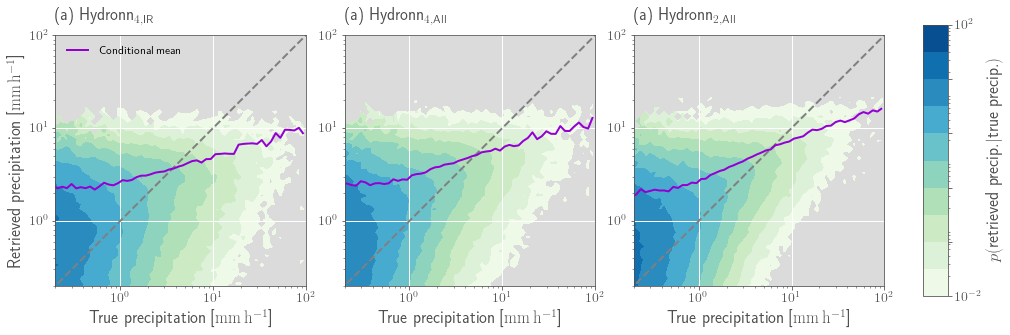

In [60]:
from matplotlib.colors import LogNorm
f, axs = plt.subplots(1, 4, figsize=(16, 5),
                      gridspec_kw={"width_ratios": [1.0, 1.0, 1.0, 0.1]})
norm = LogNorm(1e-2, 1e2)
levels = np.logspace(-2, 2, 11)

#
# Hydronn 2, IR
#

ax = axs[0]
x = 0.5 * (bins[1:] + bins[:-1])
ax.contourf(x, x, y_h4_ir.T, norm=norm, cmap="GnBu", levels=levels, zorder=-20)
ax.plot(bins, bins, ls="--", c="grey")
mean = np.sum(y_h4_ir *  db * x, axis=1)
ax.plot(x, mean, c="darkviolet", label="Conditional mean")
ax.legend()

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0.2, 100)
ax.set_ylim(0.2, 100)
ax.set_aspect(1.0)

ax.set_title(r"(a) Hydronn$_{4, \text{IR}}$", loc="left")
ax.set_ylabel("Retrieved precipitation [$\si{\milli \meter \per \hour}$]")
ax.set_xlabel("True precipitation [$\si{\milli \meter \per \hour}$]")

#
# Hydronn 2, All
#

ax = axs[1]
ax.contourf(x, x, y_h4_all.T, norm=norm, cmap="GnBu", levels=levels, zorder=-20)
ax.plot(bins, bins, ls="--", c="grey")

mean = np.sum(y_h4_all *  db * x, axis=1)
ax.plot(x, mean, c="darkviolet")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_aspect(1.0)
ax.set_xlim(0.2, 100)
ax.set_ylim(0.2, 100)

ax.set_title(r"(a) Hydronn$_{4, \text{All}}$", loc="left")
ax.set_xlabel("True precipitation [$\si{\milli \meter \per \hour}$]")

#
# Hydronn 4, All
#

ax = axs[2]
m = ax.contourf(x, x, y_h2.T, norm=norm, cmap="GnBu", levels=levels, zorder=-20)
ax.plot(bins, bins, ls="--", c="grey")

mean = np.sum(y_h2 *  db * x, axis=1)
ax.plot(x, mean, c="darkviolet")

ax.set_title(r"(a) Hydronn$_{2, \text{All}}$", loc="left")
ax.set_xlabel("True precipitation [$\si{\milli \meter \per \hour}$]")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_aspect(1.0)
ax.set_xlim(0.2, 100)
ax.set_ylim(0.2, 100)

ax = axs[3]
plt.colorbar(m, cax=ax, label=r"$p(\text{retrieved precip.}|\text{true precip.})$")

f.savefig("../plots/evaluation_scatter.png", dpi=300)

## Calibration

Calibration is currently off because training data contains values that are smaller than the smallest bin.

In [16]:
quantiles = [
    0.01, 0.05, 0.1, 0.2,
    0.3, 0.4, 0.5, 0.6,
    0.7, 0.8, 0.9, 0.95,
    0.99, 0.999
]

In [17]:
valid.shape

NameError: name 'valid' is not defined

In [18]:
sp_true = results_h4.surface_precip_true.data
valid = sp_true >= 0
sp_true = sp_true[valid]
qs = results_h4.surface_precip_quantiles.data[valid]

cal_h4 = []
for i in range(qs.shape[-1]):
    cal_h4.append((sp_true <= qs[..., i]).mean())
    
sp_true = results_h2.surface_precip_true.data
valid = sp_true >= 0
qs = results_h2.surface_precip_quantiles.data
sp_true = sp_true[valid]
qs = results_h2.surface_precip_quantiles.data[valid]

cal_h2 = []
for i in range(qs.shape[-1]):
    cal_h2.append((sp_true <= qs[..., i]).mean())

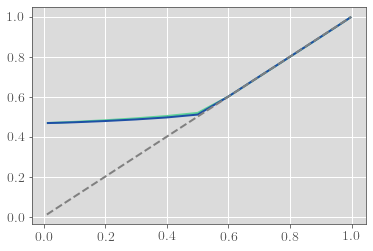

In [19]:
plt.plot(quantiles, cal_h4)
plt.plot(quantiles, cal_h2)
plt.plot(quantiles, quantiles, c="grey", ls="--")

## Error statistics

- Calculates error statistics:
    - Bias, MAE, MSE, CRPS
    


In [24]:
from quantnn import quantiles as qs

# Hydronn 4 all
sp_true = results_h4_all.surface_precip_true.data
valid = sp_true >= 0
sp_true = sp_true[valid]
sp = results_h4_all.surface_precip.data[valid]
sp_qs = results_h4_all.surface_precip_quantiles.data[valid]
bias_h4_all = np.mean(sp_true - sp)
mae_h4_all = np.mean(np.abs(sp_true - sp))
mse_h4_all = np.mean(np.abs(sp_true - sp) ** 2)
crps_h4_all = np.mean(qs.crps(sp_qs, sp, np.array(quantiles)))
corr_h4_all = np.corrcoef(x=sp, y=sp_true)[0, 1]

# Hydronn 4 ir
sp_true = results_h4_ir.surface_precip_true.data
valid = sp_true >= 0
sp_true = sp_true[valid]
sp = results_h4_ir.surface_precip.data[valid]
sp_qs = results_h4_ir.surface_precip_quantiles.data[valid]
bias_h4_ir = np.mean(sp_true - sp)
mae_h4_ir = np.mean(np.abs(sp_true - sp))
mse_h4_ir = np.mean(np.abs(sp_true - sp) ** 2)
crps_h4_ir = np.mean(qs.crps(sp_qs, sp, np.array(quantiles)))
corr_h4_ir = np.corrcoef(x=sp, y=sp_true)[0, 1]

# Hydronn 2 all
sp_true = results_h2.surface_precip_true.data
valid = sp_true >= 0
sp_true = sp_true[valid]
sp = results_h2.surface_precip.data[valid]
sp_qs = results_h2.surface_precip_quantiles.data[valid]
bias_h2 = np.mean(sp_true - sp)
mae_h2 = np.mean(np.abs(sp_true - sp))
mse_h2 = np.mean(np.abs(sp_true - sp) ** 2)
crps_h2 = np.mean(qs.crps(sp_qs, sp, np.array(quantiles)))
corr_h2 = np.corrcoef(x=sp, y=sp_true)[0, 1]

In [27]:
print(rf"""
\begin{{tabular}}{{|l||r|r|r|r|}}
  Algorithm & Bias [$\unit{{mm\ h^{{-1}}}}$] & MAE [$\unit{{mm\ h^{{-1}}}}$] & MSE [$\unit{{(mm\ h^{{-1}})^{{2}}}}$]& CRPS & Correlation  \\
  \hline
  \hydronnfourir & {bias_h4_ir:2.4f} & {mae_h4_ir:2.4f} & {mse_h4_ir:2.4f} & {crps_h4_ir:2.4f} & {corr_h4_ir:2.4f} \\
  \hydronnfourall & {bias_h4_all:2.4f} & {mae_h4_all:2.4f} & {mse_h4_all:2.4f} & {crps_h4_all:2.4f} & {corr_h4_all:2.4f} \\
  \hydronntwo & {bias_h2:2.4f} & {mae_h2:2.4f} & {mse_h2:2.4f} & {crps_h2:2.4f} & {corr_h2:2.4f} \\
 \end{{tabular}} 
 """)


\begin{tabular}{|l||r|r|r|r|}
  Algorithm & Bias [$\unit{mm\ h^{-1}}$] & MAE [$\unit{mm\ h^{-1}}$] & MSE [$\unit{(mm\ h^{-1})^{2}}$]& CRPS & Correlation  \\
  \hline
  \hydronnfourir & 0.0009 & 0.1988 & 1.3356 & 0.1807 & 0.4343 \\
  \hydronnfourall & 0.0006 & 0.1626 & 1.1848 & 0.0865 & 0.5296 \\
  \hydronntwo & -0.0001 & 0.1508 & 1.0827 & 0.0757 & 0.5844 \\
 \end{tabular} 
 
